In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import inventorize3 as inv

In [2]:
price = [5, 10, 15, 17, 20, 23, 25]
demand = [600, 550, 700, 680, 500, 400, 250]

pricing_data = pd.DataFrame({'price': price, 'demand': demand})

In [3]:
model = LinearRegression()

In [4]:
model.fit(X = pricing_data[['price']], y = pricing_data[['demand']])

LinearRegression()

In [5]:
model.intercept_

array([766.26999059])

In [6]:
model.coef_

array([[-14.64252117]])

In [7]:
guava_cost = 2.5

In [8]:
simulation_data = pd.DataFrame({'price': range(1,50)})

In [9]:
simulation_data['expected_demand'] = model.intercept_[0] + model.coef_[0]*simulation_data['price']

In [10]:
simulation_data['total_cost'] = simulation_data['expected_demand']*guava_cost
simulation_data['revenue'] = simulation_data['expected_demand'] * simulation_data['price']
simulation_data['profit'] = simulation_data['revenue'] - simulation_data['total_cost']

In [11]:
simulation_data[simulation_data['profit'] == max(simulation_data['profit'])]

,price,expected_demand,total_cost,revenue,profit
26,27,370.921919,927.304798,10014.891816,9087.587018


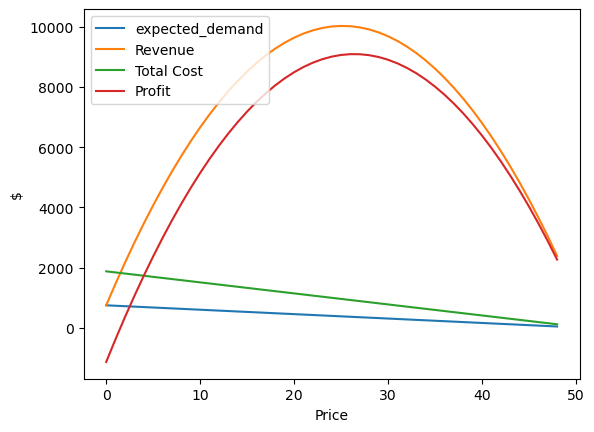

In [12]:
import matplotlib.pyplot as plt

plt.plot(simulation_data['expected_demand'], label='expected_demand')
plt.plot(simulation_data['revenue'], label='Revenue')
plt.plot(simulation_data['total_cost'], label='Total Cost')
plt.plot(simulation_data['profit'], label='Profit')
plt.xlabel('Price')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show()

In [13]:
inv.linear_elasticity(pricing_data['price'], pricing_data['demand'], 23, 2.5)

C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


{'Elasticity': array([[0.78413098]]),
 'optimum_price_profit': array([[27.41591712]]),
 'optimum_price_revenue': array([[26.16591712]])}

In [14]:
retail_clean = pd.read_csv('retail_clean.csv')

In [15]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'], format = '%d/%m/%Y %H:%M')
retail_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [16]:
retail_clean['year'] = retail_clean['InvoiceDate'].dt.year
retail_clean['week'] = retail_clean['InvoiceDate'].dt.isocalendar().week

In [17]:
retail_clean['weekyear'] = retail_clean['InvoiceDate'].dt.strftime('%W %Y')

In [18]:
weekly_sales = retail_clean.groupby(by = ['Description', 'weekyear']).agg(total_sales = ('Quantity', 'sum'), 
                                                           price = ('Price', 'mean')).reset_index()

In [19]:
keys = weekly_sales['Description'].unique()
keys

array(['  DOORMAT UNION JACK GUNS AND ROSES', ' 3 STRIPEY MICE FELTCRAFT',
       ' 4 PURPLE FLOCK DINNER CANDLES', ...,
       'ZINC WILLIE WINKIE  CANDLE STICK', 'ZINC WIRE KITCHEN ORGANISER',
       'ZINC WIRE SWEETHEART LETTER TRAY'], dtype=object)

In [20]:
empty_data = pd.DataFrame()

for key in keys:
    try:
        a = weekly_sales[weekly_sales.Description == key]
        cost = 0.4 * max(a['price'])
        current_price = a['price'].mean()
        elasticity = inv.linear_elasticity(a['price'], a['total_sales'], current_price, cost)
        elasticity = dict({k:v[0] for k, v in elasticity.items()})
        data = pd.DataFrame(elasticity, index = [0])
        data['Description'] = key
        empty_data = pd.concat([empty_data, data], axis = 0)
    except:
        continue

C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:662: RuntimeWarning: divide by zero encountered in divide
  optimum_profit=(-derv_p*cost_of_product+ intercept)/(2*-derv_p)
C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:663: RuntimeWarning: divide by zero encountered in divide
  opti

In [21]:
empty_data

,Elasticity,optimum_price_profit,optimum_price_revenue,Description
0,0.236196,18.647377,17.297377,DOORMAT UNION JACK GUNS AND ROSES
0,5.031167,1.907023,1.397023,4 PURPLE FLOCK DINNER CANDLES
0,2.317158,4.362780,3.372780,FLAMINGO LIGHTS
0,9.924642,11.116022,8.126022,NINE DRAWER OFFICE TIDY
0,10.182036,7.366893,5.376893,OVAL WALL MIRROR DIAMANTE
...,...,...,...,...
0,0.522260,1.670030,1.404696,ZINC T-LIGHT HOLDER STAR LARGE
0,6.455125,12.002371,8.612371,ZINC TOP 2 DOOR WOODEN SHELF
0,0.410898,1.691342,1.469342,ZINC WILLIE WINKIE CANDLE STICK
0,5.966357,7.613621,5.533621,ZINC WIRE KITCHEN ORGANISER
